# JAMES CHUKWUKA TABANSI

## Problem Statement:

- The objective of this project is to explore the dataset and identify key differences between customers for each product. By analyzing various customer attributes and conducting univariate and multivariate analyses, the goal is to generate valuable insights and recommendations that will assist the company in effectively targeting new customers. The challenge is to develop comprehensive customer profiles and provide actionable strategies that align with the business objectives, leveraging Python as the primary tool for data analysis.
## Objective Statement:
- The ultimate objective is to generate actionable insights and strategic recommendations that will enable the company to effectively target and attract new customers. The goal of this project is to leverage my expertise in Python and data analysis techniques, I aim to thoroughly explore the dataset, uncovering distinctions among customers for each product and establishing connections between various customer attributes. By conducting comprehensive univariate and multivariate analyses, I strive to develop comprehensive customer profiles for each product.

### import relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the data

In [3]:
path = '/Users/user/Downloads/CardioGoodFitness-1.csv'
df1 = pd.read_csv(path)

### sample the data

In [4]:
df1.sample(n = 5)
#view any 5 rows of the data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
153,TM798,25,Male,18,Partnered,4,3,64741,100
60,TM195,33,Female,16,Partnered,3,3,46617,85
50,TM195,29,Male,18,Partnered,3,3,68220,85
51,TM195,29,Female,14,Partnered,2,2,46617,38
91,TM498,23,Female,16,Partnered,3,2,43206,74


### Data exploration

In [7]:
#shape of the dataset
df1.shape

(180, 9)

- there are 180 rows and 9 columns in this data

In [6]:
#explore the data types for each of the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


1. there are no missing values for this data
2. the product, gender and maritalstatus, are of object datatype, while others are integers. 

In [56]:
#overview of the descriptive properties of each column of the dataset
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0



1. Product
    - there are 3 unique type of treadmills and the most used is the TM195 version
    - 80 customers out of 180, make use of the TM195
    * if we group customers based on income range, which of the subset purchased the TM195 version more? what does that suggest about the product?

2. Age
    - the youngest customer is 18yrs and the oldest customer is 50 years, this could mean that olders people above 50years do not enjoy running miles using the treadmill to exercise or could be an insight to sales and media team to educate this absent age class on the benefits of treadmill
    - 50 % of the customers are not above 26years. and 25 % of the entire customer population age between 24years and 26years, this is because they occupy the 25th to 50th percentile and might just be the age grade with the highest frequency.
    - the mean age (28.79), is close to the median age (26), this suggests a normal distribution of the customers' age.
    * if we subset or group into different age grade, how often does customers of the age grade use the treadmill, and how fit are they?
    
3. Gender
    - there are 2 age categories, most of which are male.
    * relative to male and female category, which is more fit?
    
4. Education
    - 75% of the customers have spent at least 16years in school
    - the minimum years spent in school is 12 and the maximum is 21.
    - this could mean that majority if the customers are highly educated
   * does education levvel affect fitness level?
   
5. MaritalStatus
    - there are only 2 categories, and most of the customers are partnered
    * compared to the single partners, which of them make use of the treadmill more and which is more fit?
  
6. usage
    - 50% of the customers make use of the treadmill at least 3 times weekly

7. Fitness
    - 50 % of the customers have fitness level on or below average (3.0)
    - the mean fitness (3.3) is close to the median value (3.0)

8. income
    - the minimum income is 29,562 and the maximum is 104,581.
    - 50% of the customers earn below the mean. this suggests the presence of outliers in this column
    
9. Miles
    - 50% of customers are expected to run within 94 miles.
    - the maximum mile a customer is exxpected to run is 360


In [13]:
#display the correlation between each numeric variables of the dataset
df1.corr().T

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


- there is a strong positive correlation between 'Miles' and 'Fitness', the more miles a person runs, the more fit they are

- there is a good positive correlation between 'fitness' and 'income', this might mean that richer customers exercise more.

- age has little correlation to features such as usuage, fitness and miles.

## Univariate Analysis

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [105]:
# this function will serve to easily help us plot a histogram and a boxplot with shared x-axis.

def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    kind: specifies if a histogram or countplot should be plotted
    """
    
    f1, (ax_box, ax_hist) = plt.subplots(2, 1, #fig should appear in a 2 rows and 1 column style
                                     #nrows=2, #number of rows on grid = 2
                                    sharex = True, # share the x column
                                    gridspec_kw={"height_ratios": (0.25, 0.75)},
                                        figsize = figsize)

    # plot the boxplot
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="mediumturquoise")
    
        #plot the hisstogram
    if bins != None:
            #if bins is specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="mediumpurple")
    else:
            #if bins is not specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, color="mediumpurple")

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

        ax_hist.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    


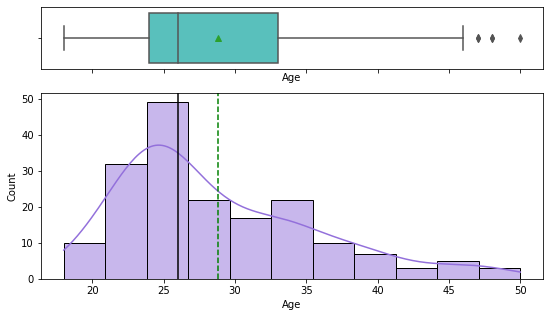

In [106]:
histogram_boxplot(data = df1, feature='Age', kde = True)

* the shape of the density distribution curve suggest the presence of outliers in this feature. from our EDA,the mean age (28.79), the median age (26), since the mean is greater than the median, this conforms to expectation. we see that some customers are as old as 50years and are responsible for the right skew of our graph. 

* the graphs suggests that a larger number of people in our data (THE MODE), age between 24 to 26 and the boxplot defines this age class to be between the 25th and 50th percentile.

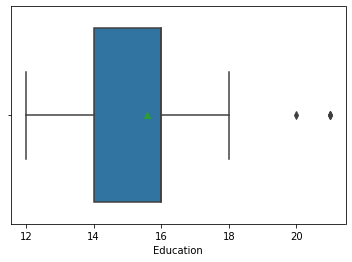

In [125]:
#plot a countplot for the education column

sns.boxplot(data = df1, x='Education', showmeans = True);

* the boxplot shows that 75% of the customers have spent at least 16 years in school.
* the minimum years spent in school by an customer is 12years and only 25% of the customers have spent higher than 16years in school.

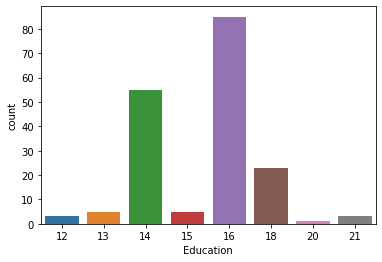

In [124]:
#plot a countplot for the education column
sns.countplot(data = df1, x='Education');

* the mode (most frequent) number of years in education is 16 years.

later on we would hope to see the relationship between the fitness level of people with education above 16years, relative to the fitness level of customers with education from 16years below.

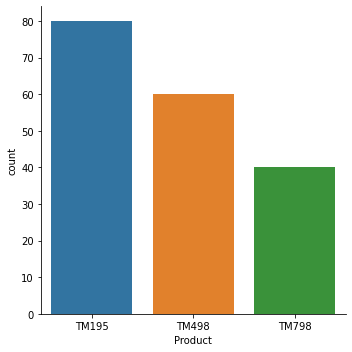

In [146]:
sns.catplot(data=df1, x = 'Product', kind='count');

* 80 customers make use of TM195,
* 60 customers make use of TM498,
* 40 customers make use of TM798.

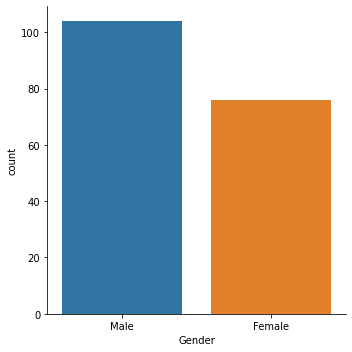

In [131]:
sns.catplot(data=df1, x = 'Gender', kind='count');

* there are more males in this dataset than females.


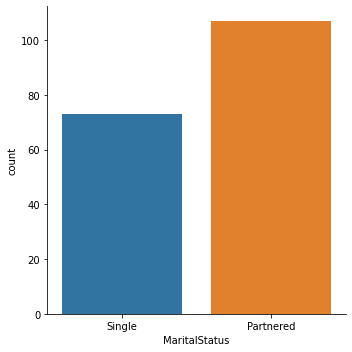

In [142]:
sns.catplot(data=df1, x = 'MaritalStatus', kind='count');


* there are more customers with partners than single customers

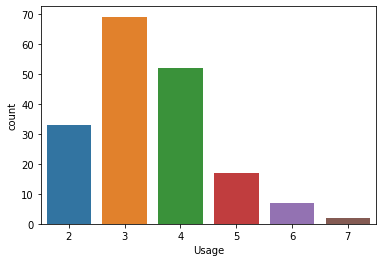

In [160]:
sns.countplot(data = df1, x='Usage');

* all customers make use of their products at least 2 times weekly.
* many customers make use of their products 3 times on avergae.
* there are still some customers who make use of the products 7 times on average.

- what properties would the last set of customers have that akes them different from others?

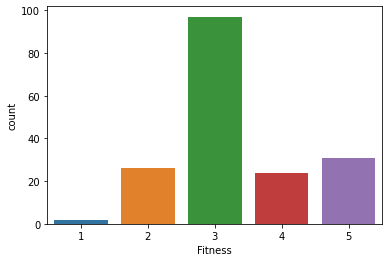

In [161]:
sns.countplot(data = df1, x='Fitness');

* this shows that most of the customers are averagely fit.
* 

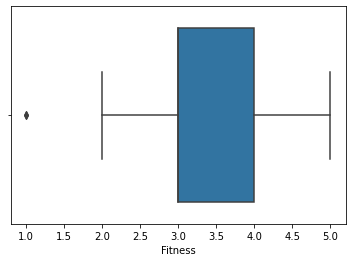

In [163]:
sns.boxplot(data=df1, x = 'Fitness');

* this shows that 50%(25th - 75th percentile) of the customers have fitness level ranging from 3-4

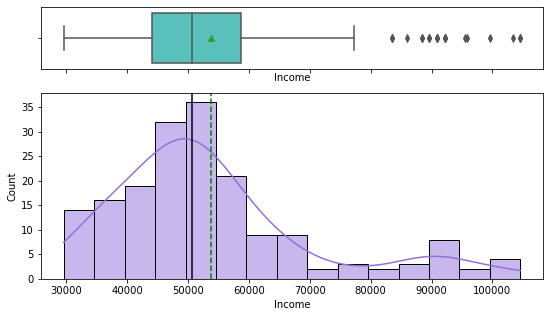

In [166]:
histogram_boxplot(data = df1, feature = 'Income', kde = True)

* 75% of the population earn less than 60,000. this means that the mean of income will be affected by outliers (income above 70,000)

* the mean of this distribution is greater than the median, and shows a right skew explained by customers that have income larger income.

* the distribution suggests that segmenting customers into 2 clases may prove to be informative,
    - income range 30,000 to 69,900 and 70,000 to 100,000

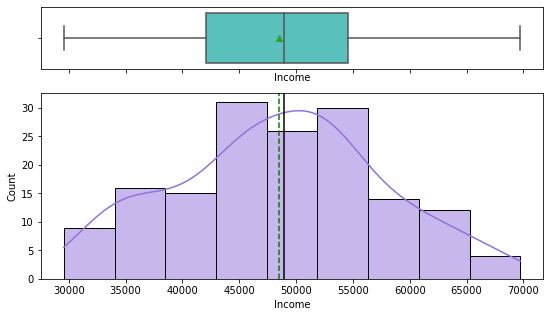

In [179]:
histogram_boxplot(data = df1[df1['Income'] < 70000], feature = 'Income', kde = True)

#which product is mostly used by this subclass and how fit are they?

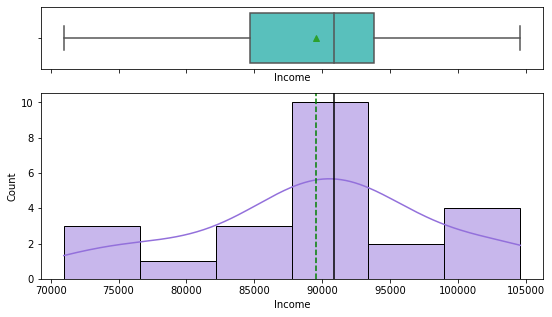

In [178]:
histogram_boxplot(data = df1[df1['Income'] >= 70000], feature = 'Income', kde = True)

#which product is mostly used by this subclass and how fit are they?

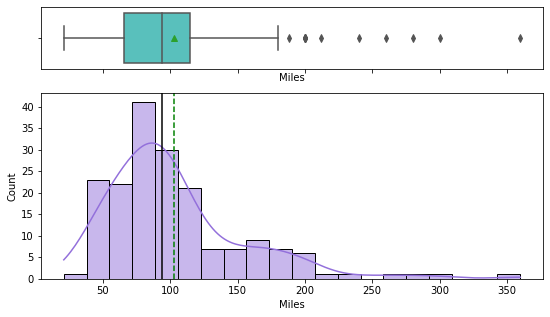

In [177]:
histogram_boxplot(data = df1, feature = 'Miles', kde=True)

 - 50% of customers are expected to run within 94 miles.
 * the right skew observed is as a result of higher number of miles some customers are expected to run (350). These are the very fit customers.

## Multivariate Analysis

### The goal of the multivariate analysis, is to understand the relationship between the products and other variables, thereby defining the characteristics of the customers of each product. From this insight, recommendations will be made.

### Correlation plot with Heatmap

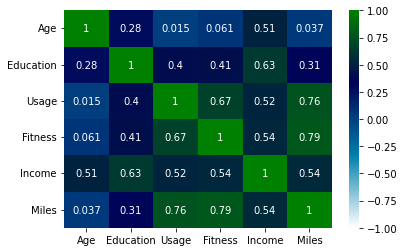

In [14]:
#plot a heatmap with the correlation values


#remove all the text columns or categorical columns and include only integer or float column
df2 = df1.select_dtypes(exclude='object')

#store it in a variable
corr_data = df2.corr()

#plot a heat map with the data
sns.heatmap(data= corr_data, vmin=-1, vmax=1, cmap = 'ocean_r', annot=True);

- All variable has a positive correlation with eachother.
- Insight from map shows that Age has a strong positive correlation with Income and howbeit lesser with education; the older a customer gets the greater his income and knowledge and probably the higher the his purchasing power to buy a product

- Insight from map shows that Education has a strong positive correlation with Income and Fitness, this suggests that the more education a person receives, the more he understands the importance of keeping fit and the higher his income to purchase the products

- From the map, Usuage has a strong correlation with Miles, Income, Fitness, and education. This suggests that the more educated a customer is, the higher his usuage of the product, moreso, the higher his fitness.

### Scatter Plot


- To visualize 2 numerical variables and categorize the plot with a categorical variable, 

- i will define a function that will do the above and can also plot a categorical plot witha numerical varibale as hue

In [45]:
def scatter_or_cat(data, x = None, y = None, kind = None):
    """
    data = data source
    x = variable on x axis
    y = variable on y axis for scatterplot or hue variable for catplots
    kind: if kind == 'cat', plot a categorical plot or 'scat' for scatter plots
    """
    if kind == 'scat':
        sns.scatterplot(data= data,
                       x =x,
                       y = y,
                       hue = 'Product');
    elif kind == 'cat':
        sns.catplot(data=data, x = x, kind='count', hue = y);
        


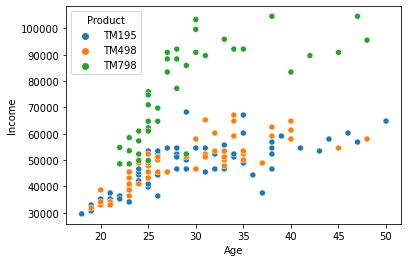

In [49]:
scatter_or_cat(data = df1, x = 'Age', y = 'Income', kind = 'scat')


- this shows that customers across all ages with higher income and make use of the TM798
- product TM195, is largely used by customers of lower income class, accross all age grades and this suggests that the products is largely affordable.
- a higher concentration of customers who use TM498, are between 23 -40 years old, with a bit more higher income. 

### Relationship between Education and Product
* the aim is to understand the relationship between thelevel of education of a customer and the type of product they use.

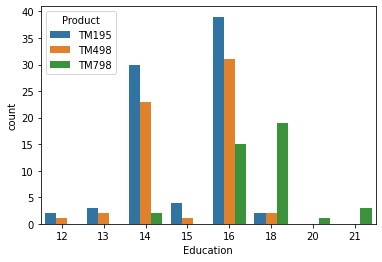

In [160]:
# display a countplot for education categorized by product
sns.countplot(data=df1, x = 'Education', hue='Product');



- customers with higher education use mostly, TM798.
- TM195 is used by many customers from all education levels except levels greater than 20. This shows the product may have good versatility.
- TM498 is used predominantly by customers with education level 14-16, which is around the mean value (15.57) for education.

### Relationship between Fitness and Product

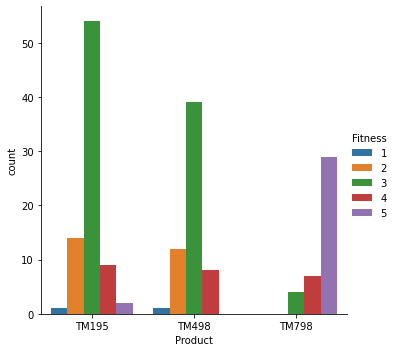

In [63]:
scatter_or_cat(data = df1, x = 'Product', y = 'Fitness', kind = 'cat')

* this is to visualize how fit customers of different products are
    - Most Users of TM195 and TM498 are averagely fit.
    - there are more unfit customers (fitness rating of 2 and 1) using TM195 than any other product
    - No user of TM498 is perfectly fit
    - Most Users of TM798 are perfectly fit

### How Fit are Partnered customers relative to single customers?

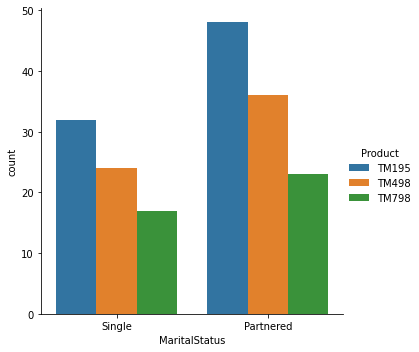

In [109]:
sns.catplot(data=df1, x = 'MaritalStatus', kind='count', hue = 'Product');


- THis means that there are more partnered customers than single customers for each of the product category

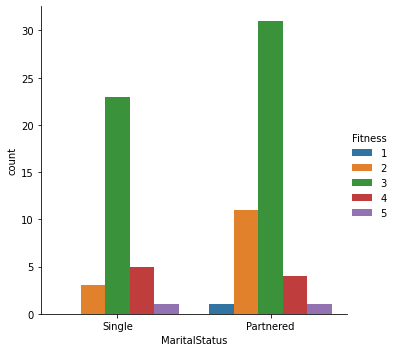

In [106]:
#countplot for customers using TM195 categorizes by Marital status
sns.catplot(data=df1[df1.Product == 'TM195'], x = 'MaritalStatus', kind='count', hue = 'Fitness');


- In general, this shows that more partnered customers are averagely fit.
- More Partnered customers have fitness level of 2 relative to single customers.
- this shows that some partnered customers using TM195 are highly unfit, lets look at these subset in particular

In [107]:
#subset dataset based on partnered customers with fitness level of 1
df1.query("MaritalStatus == 'Partnered' & Fitness == 1")

#subset dataset based on partnered customers with fitness level of 2
#df1.query("MaritalStatus == 'Partnered' & Fitness == 2")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,TM195,23,Male,16,Partnered,3,1,38658,47


- although this customer uses the product on an average of 3 times and is well educated, he is still poorly fit.
- this suggests that there may be customers with underlying health condition or poor fitness habits that might cause them to add weight irrespective of how much they exercise.

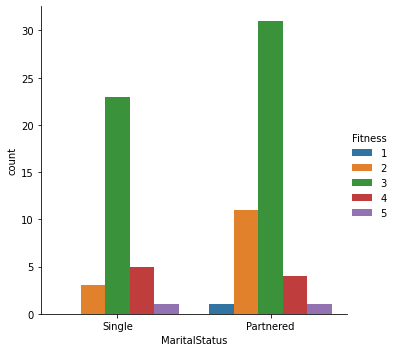

In [174]:
#countplot for customers using TM195 categorizes by Marital status

sns.catplot(data=df1[df1.Product == 'TM195'], x = 'MaritalStatus', kind='count', hue = 'Fitness');


- More Partnered customers making use of TM195 have fitness level of 2 (unfit) relative to single customers, this product has the highest ratio of unfit partnered customers to unfit single customers

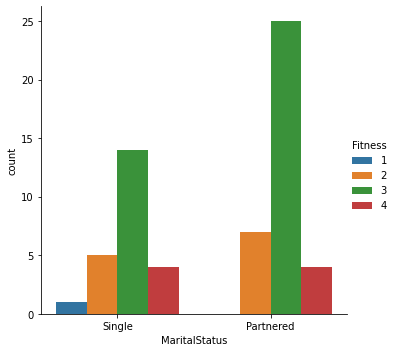

In [108]:
#countplot for customers using TM498 categorizes by Marital status

sns.catplot(data=df1[df1.Product == 'TM498'], x = 'MaritalStatus', kind='count', hue = 'Fitness');


- More Partnered customers making use of TM498 have fitness level of 2 (unfit) relative to single customers, although this much lower than customers that make use of TM195


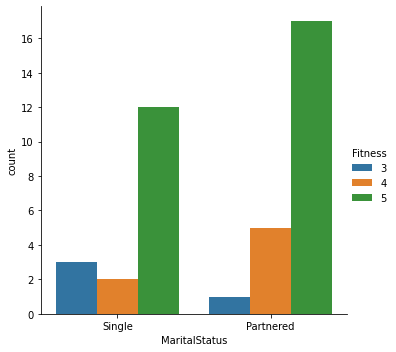

In [96]:
#countplot for customers using TM798 categorizes by Marital status

sns.catplot(data=df1[df1.Product == 'TM798'], x = 'MaritalStatus', kind='count', hue = 'Fitness');


* this shows that there are more unfit married customers than single customers. To prove this further...

In [99]:
#subset of unfit married customers
df1.query("MaritalStatus == 'Partnered' & Fitness < 3")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,TM195,20,Male,13,Partnered,4,2,35247,47
11,TM195,22,Female,14,Partnered,3,2,35247,66
14,TM195,23,Male,16,Partnered,3,1,38658,47
19,TM195,23,Female,15,Partnered,2,2,34110,38
25,TM195,24,Male,13,Partnered,3,2,42069,47
29,TM195,25,Female,14,Partnered,2,2,53439,47
32,TM195,25,Female,16,Partnered,2,2,40932,47
36,TM195,26,Male,16,Partnered,2,2,53439,47
41,TM195,27,Female,14,Partnered,3,2,45480,66
51,TM195,29,Female,14,Partnered,2,2,46617,38


In [101]:
#subset of unfit single customers

df1.query("MaritalStatus == 'Single' & Fitness < 3")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
56,TM195,31,Female,14,Single,2,2,45480,47
59,TM195,33,Female,16,Single,2,2,55713,38
62,TM195,34,Female,16,Single,2,2,52302,66
92,TM498,23,Female,14,Single,3,2,40932,53
94,TM498,24,Female,14,Single,3,2,40932,85
106,TM498,25,Female,14,Single,2,2,45480,42
111,TM498,27,Male,14,Single,4,2,45480,53
117,TM498,31,Female,18,Single,2,1,65220,21
130,TM498,35,Female,16,Single,3,2,50028,64


### how well are the products used by different genders?


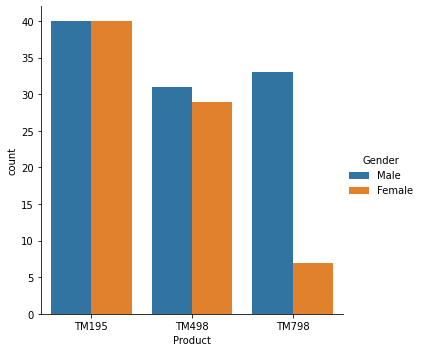

In [110]:

sns.catplot(data=df1, x = 'Product', kind='count', hue='Gender' );

- An equal number of Male and female customers using the TM195, suggests that the product is gender friendly
- A verly low number of female make use of TM798.
- More Males use TM498 Treadmill than Females

### customers that make use of TM798

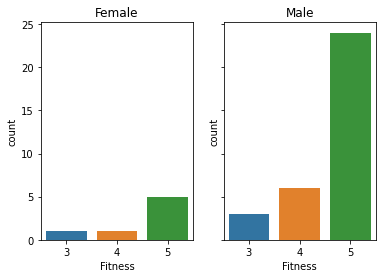

In [158]:
#lets subset the data to get the female that use the TM798
data_women = df1.query("Product == 'TM798' & Gender == 'Female'")

#lets subset the data to get the male that use the TM798
data_men = df1.query("Product == 'TM798' & Gender == 'Male'")

#showing how fit these men and women are using subplots
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)  #create a subplot with 1 row and 2 columns, with shared y-axis
ax1.title.set_text('Female') #title of first plot as female
ax2.title.set_text('Male') #title of second as male
sns.countplot(data= data_women, x = 'Fitness', ax=ax1);
sns.countplot(data= data_men, x = 'Fitness', ax = ax2);

- this shows that 5 out of the 7 female that make use of TM798 are completely fit. This can be a selling point to women that desire fitness
- very few male customers that make use of the TM798 are moderately fit, most of them are completely fit.

### customers that make use of TM498

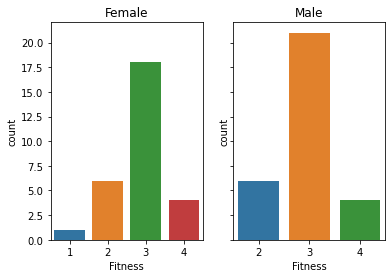

In [159]:
#lets subset the data to get the female that use the TM498
data_women = df1.query("Product == 'TM498' & Gender == 'Female'")

#lets subset the data to get the male that use the TM498
data_men = df1.query("Product == 'TM498' & Gender == 'Male'")

#showing how fit these men and women are using subplots
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.title.set_text('Female')
ax2.title.set_text('Male')
sns.countplot(data= data_women, x = 'Fitness', ax=ax1);
sns.countplot(data= data_men, x = 'Fitness', ax = ax2);

- Although no female using this product is perfectly fit, this shows that most male and female users of TM498 treadmill are moderately fit.
- Some customers of this product are unfit,(Fitness level of 2) and some female are very unfit (Fitness level of 1)
- No male customer using the TM498 is very unfit (Fitness level of 1)

### customers that make use of TM195

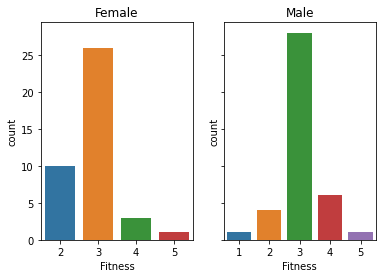

In [156]:
#lets subset the data to get the female that use the TM195
data_women = df1.query("Product == 'TM195' & Gender == 'Female'")

#lets subset the data to get the male that use the TM195
data_men = df1.query("Product == 'TM195' & Gender == 'Male'")

#showing how fit these men and women are using subplots
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)  #create a subplot with 1 row and 2 columns, with shared y-axis
ax1.title.set_text('Female') #title of first plot as female
ax2.title.set_text('Male') #title of second as male
sns.countplot(data= data_women, x = 'Fitness', ax=ax1);
sns.countplot(data= data_men, x = 'Fitness', ax = ax2);

- There are more unfit female users of TM195 than any other product (fitness level of 2). So women that desire higher fitness level can be advised to purchase or use TM498 or best, TM798.
- some male customers of this product are very unfit (fitness level of 1)

### Relationship between Usage of the product and Fitness level of the users

- The goal is to understand the fitness level the customers of each product has as a result of their usage.

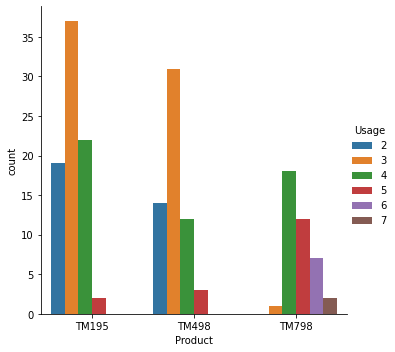

In [113]:
#plot showing the usage of the products.
scatter_or_cat(data=df1, x = 'Product', y = 'Usage', kind = 'cat')

- customers using TM798, make use of the product an average of 4 times and a maximum of 7 times
- TM195 and TM498 are mostly used 3 times on average and a maximum of 5 times.


### Usage and Fitness level of customers that use TM195 product

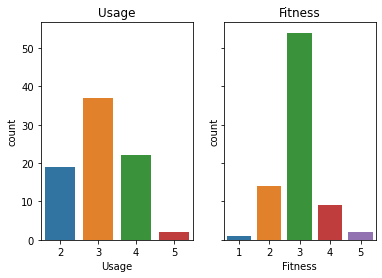

In [172]:
f, (ax_use, ax_fit) = plt.subplots(nrows = 1, #number of rows as 1
                                  ncols=2, #number of columns as 2
                                  sharey=True, #share the same y-axis
                                  )
#subset of data to people that use TM195 only
sns.countplot(data=df1[df1['Product'] == 'TM195'], x = 'Usage', ax=ax_use);
ax_use.title.set_text('Usage')

sns.countplot(data=df1[df1['Product'] == 'TM195'], x = 'Fitness', ax=ax_fit);
ax_fit.title.set_text('Fitness')


- Most users of TM195, use the product 3 times on average, and many of them have average fitness level.
- although more than 20 people make use of the product 4 times on average and very little use it 5 times, only a few (less than 10) of them attain very high fitness levels (fitness level greater than 3 i.e 4 and 5).

### Usage and Fitness level of customers that use TM498 product

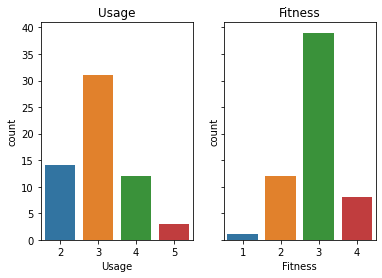

In [170]:

f, (ax_use, ax_fit) = plt.subplots(nrows = 1, #number of rows as 1
                                  ncols=2, #number of columns as 2
                                  sharey=True, #share the same y-axis
                                  )
#subset of data to people that use TM498 only
sns.countplot(data=df1[df1['Product'] == 'TM498'], x = 'Usage', ax=ax_use);
ax_use.title.set_text('Usage')

sns.countplot(data=df1[df1['Product'] == 'TM498'], x = 'Fitness', ax=ax_fit);
ax_fit.title.set_text('Fitness')


- MOst users of this product use it 3 times on average and many of them have fitness level of 3.
- about 14 people use TM498, 2 times on average, and lesser than 14 people have fitness level below 2. this could mean that TM498 product is much better at helping customers achieve moderate fitness levels than TM195.

### Usage and Fitness level of customers that use TM798 product


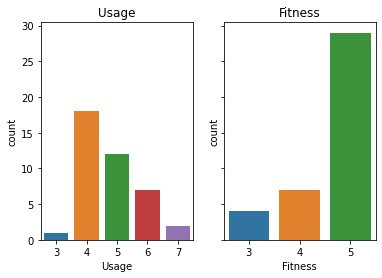

In [173]:
f, (ax_use, ax_fit) = plt.subplots(nrows = 1, #number of rows as 1
                                  ncols=2, #number of columns as 2
                                  sharey=True, #share the same y-axis
                                  )
#subset of data to people that use TM798 only
sns.countplot(data=df1[df1['Product'] == 'TM798'], x = 'Usage', ax=ax_use);
ax_use.title.set_text('Usage')

sns.countplot(data=df1[df1['Product'] == 'TM798'], x = 'Fitness', ax=ax_fit);
ax_fit.title.set_text('Fitness')


- Although most customers make use of TM798 4 times on average, many of them are very fit. This could mean that the product is user friendly and helps users achieve optimal results much better than other products.

### Customer Profile

### TM195
- TM195 is the most used product, it is mostly used by customers with lower income. this suggests that it is highly affordable relative to the other products and can still help the customer achieve fitness. It is also gender friendly as both genders illustrated by equal number of purchases from both gender class. The average fitness level for customers of this product is 3.

### TM498
- Although this product may be more expensive than TM195, this product can be seen as a better substitute for TM195 because
- Most unfit customers with high income make use of TM498 and no customer using the TM498 is highly fit, rather most of the customers using this products are averagely fit. 


### TM798
- TM798:
    customers who make use of this product are at least moderately fit. it seems to be the most expensive, and this behaviour could likely be because it is purchased by cardio enthusiast or probably it is knowledge based, because these category of customers have spent on average 17years in school. It is best used to achieve higher fitness level and has higher number of usage by customers, this could be that the product is user friendly and has higher efficiency than other Products


### Recommendation

- Female customers with lower income, should be advised to purchase or use the TM498 instead of the TM195 because analysis has shown that Female users of TM498 achieve higher fitness level than those of TM195

- Although moderate fitness level can achieved using TM195, Partnered customers that desire higher fitness level can be advised to make use of TM498 or TM798 for better chances of attaining higher fitness.

- Customers with higher income that desires higher fitness level should be advised to purchase TM798.